# Linear Regression - more advanced

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## PREPARE DATE

### DATASET

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
#Read dataset
df = pd.read_csv('./Dataset/Ecommerce Customers')

In [3]:
#Head of dataset
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
#General dataset statistics
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
#Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


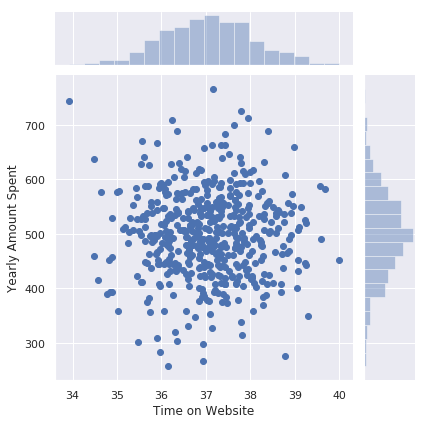

In [6]:
#Jointplot for 'Time on Website' and 'Yearly Amount Spent' columns
sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent')

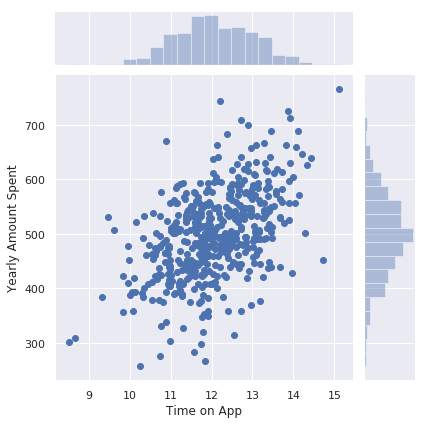

In [7]:
#Jointplot for 'Time on App' and 'Yearly Amount Spent' columns
sns.jointplot(data=df, x='Time on App', y='Yearly Amount Spent')

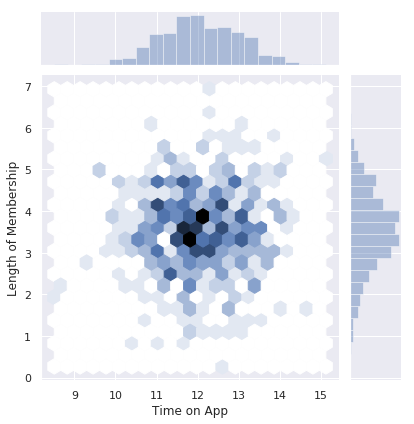

In [8]:
#Hexplot for 'Time on App' and 'Length of Membership' columns
sns.jointplot(data=df, x='Time on App', y='Length of Membership', kind='hex')

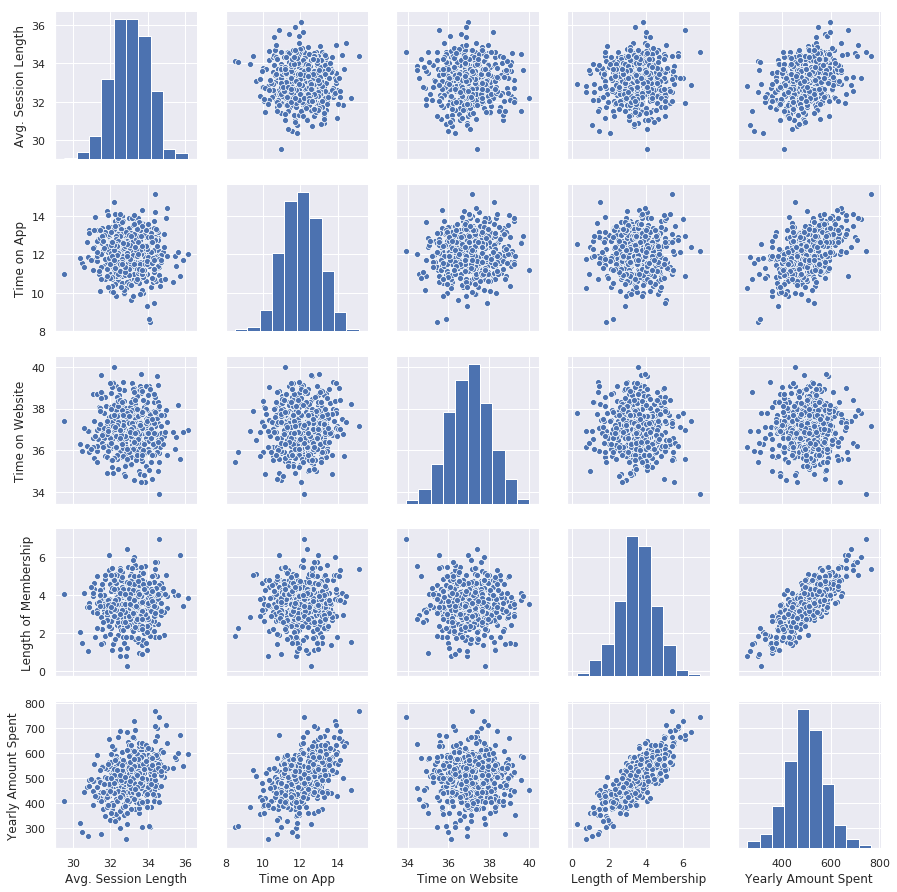

In [9]:
#Correlation between columns
sns.pairplot(df)

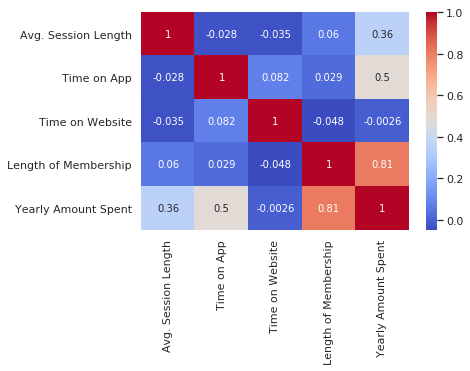

In [10]:
#Correlation between columns as heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

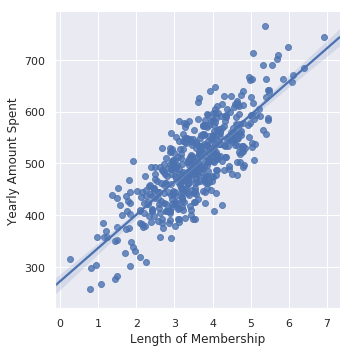

In [11]:
#Regression plot for 'Length of Membership' and 'Yearly Amount Spent' columns
sns.lmplot(data = df, x='Length of Membership', y='Yearly Amount Spent')

In [12]:
#Columns in dataset
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
#Split data for training and testing
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

## Linear Regression

In [14]:
#Create Linear Regression
lm = LinearRegression()

In [15]:
#Train model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#Intercept
lm.intercept_

-1047.932782250239

In [17]:
#Coefficients
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [18]:
#Coefficients to DataFrame
pd.DataFrame(lm.coef_, X_train.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [19]:
#Predict test labels
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Values')

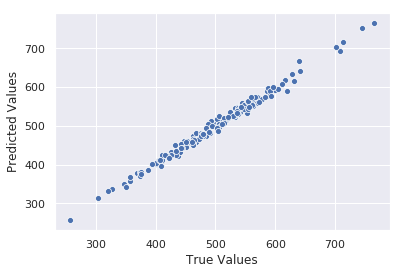

In [20]:
#Residual plot
sns.scatterplot(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

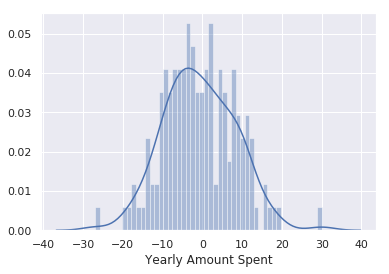

In [21]:
#Residual histogram
sns.distplot(y_test-predictions, bins=50)

In [22]:
#Show error metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.explained_variance_score(y_test, predictions))

MAE: 7.228148653430839
MSE: 79.81305165097466
RMSE: 8.933815066978646
R^2: 0.9890771231889606
